### Distribuição de Frequência

A Distribuição de Frequência é um método estatístico essencial utilizado para organizar e analisar conjuntos de dados, facilitando a compreensão e interpretação das informações contidas neles. Este processo envolve agrupar dados em classes ou categorias e contar a frequência com que cada categoria ocorre no conjunto de dados. Especificamente, neste caso, estamos lidando com um conjunto de dados que consiste em medidas, possivelmente representando alturas ou outra variável mensurável

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

### Ordenação

In [3]:
dados = np.sort(dados)

> A linha dados = np.sort(dados) no Python utiliza a função sort do NumPy para organizar os elementos do array dados em ordem crescente. 

In [4]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [12]:
minimo = dados.min()
minimo

150

In [5]:
maximo = dados.max()
maximo

173

In [6]:
np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

<BarContainer object of 40 artists>

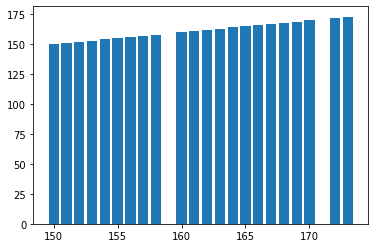

In [7]:
plt.bar(dados, dados)

### Número de Classes com a Regra de Sturges

A fórmula $i = 1 + 3.3 \log n$ é comumente usada para determinar o número de classes (ou intervalos) em uma tabela de distribuição de frequência. Esta é uma aplicação da regra de Sturges, um método prático para calcular o número de classes que melhor representa os dados numa distribuição de frequência, sendo particularmente útil em grandes conjuntos de dados.

#### Detalhes da Fórmula:

- **$n$**: Representa o número total de observações no conjunto de dados.
- **$\log$**: Refere-se ao logaritmo na base 10.
- **$1 + 3.3 \log n$**: A constante 3.3 é derivada do $\log_2$, e ajuda a garantir que o número de classes cresça proporcionalmente ao logaritmo do número de dados.

#### Por que Usar a Regra de Sturges?

- **Simplicidade e Praticidade**: Oferece uma maneira rápida de estabelecer o número de classes sem cálculos complexos.
- **Adaptabilidade**: Útil quando não há uma ideia clara de como os dados estão distribuídos.
- **Eficiência para Grandes Amostras**: Mais eficaz para grandes conjuntos de dados, onde a simples visualização dos dados é insuficiente.

#### Limitações:

- **Sensibilidade a $n$**: Pode não ser ideal para conjuntos de dados muito pequenos ou muito grandes.
- **Assume Normalidade**: Supõe que os dados estão aproximadamente normalmente distribuídos, o que pode não ser sempre o caso.

In [8]:
n = len(dados)
n

40

In [9]:
i = 1 + 3.3 * np.log10(n)
i

6.286797971382275

In [10]:
i = round(i)
i

6

### Amplitude do intervalo

A amplitude do intervalo, representada por $h$, é um conceito chave na construção de tabelas de distribuição de frequência. Ela indica a largura de cada classe ou intervalo e é determinada pela fórmula:

$$h = \frac{AA}{i}$$

onde:
- $h$ é a amplitude do intervalo.
- $AA$ é a amplitude absoluta, que é calculada como a diferença entre o maior valor ($X_{\text{max}}$) e o menor valor ($X_{\text{min}}$) nos dados.
- $i$ é o número de classes, que pode ser determinado por métodos como a regra de Sturges.

#### Importância da Amplitude do Intervalo:

- **Adequação da Representação**: A escolha correta da amplitude do intervalo é crucial para uma representação adequada da variabilidade dos dados.
- **Facilitação da Interpretação**: Intervalos muito pequenos podem levar a uma tabela com muitos detalhes, tornando difícil a interpretação, enquanto intervalos muito grandes podem esconder padrões significativos nos dados.
- **Impacto na Visualização**: A amplitude do intervalo influencia diretamente a visualização e interpretação de gráficos de frequência, como histogramas.

h = AA / i

AA = Xmax - Xmin

In [13]:
AA = maximo - minimo
AA

23

In [14]:
h = AA / i
h

3.8333333333333335

In [15]:
import math
h = math.ceil(h)
h

4

### Construção da distribuição de frequência

Para construir uma distribuição de frequência a partir de um conjunto de dados, um passo crucial é determinar os intervalos de classe. Isso envolve definir o início e o fim de cada intervalo com base na amplitude do intervalo calculada anteriormente. O uso da função `np.arange` do NumPy é uma maneira eficaz de criar esses intervalos automaticamente.

#### Definição dos Intervalos de Classe:

Para determinar os intervalos de classe, utilizamos a seguinte expressão:

$$\text{intervalos} = np.arange(\text{minimo}, \text{maximo} + 2, \text{step} = h)$$

onde:
- $\text{minimo}$ é o menor valor no conjunto de dados.
- $\text{maximo}$ é o maior valor no conjunto de dados.
- $h$ é a amplitude do intervalo.

A função `np.arange` gera valores dentro de um intervalo com um espaçamento definido por `h`, partindo do valor mínimo até o máximo. O $\text{maximo} + 2$ garante que o último intervalo inclua o valor máximo.

In [16]:
intervalos = np.arange(minimo, maximo + 2, step = h)
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [17]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0
for i in range(n):
  if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
    intervalo1 += 1
  elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
    intervalo2 += 1
  elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
    intervalo3 += 1
  elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
    intervalo4 += 1
  elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
    intervalo5 += 1
  elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
    intervalo6 += 1

In [18]:
lista_intervalos = []
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)
lista_intervalos

[5, 9, 11, 7, 5, 3]

In [19]:
lista_classes = []
for i in range(len(lista_intervalos)):
  lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i + 1]))

In [20]:
lista_classes

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

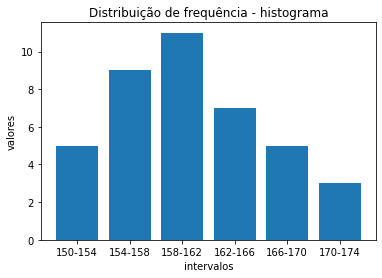

In [21]:
plt.bar(lista_classes, lista_intervalos)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('intervalos')
plt.ylabel('valores');

### Distribuição de frequência e histograma com numpy e matplotlib

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

In [22]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [23]:
frequencia, classes = np.histogram(dados)

In [24]:
frequencia, classes, len(classes)

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2], dtype=int64),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

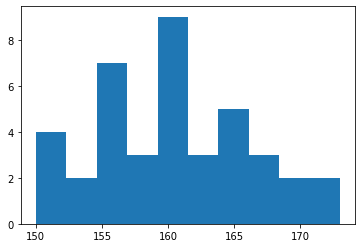

In [25]:
plt.hist(dados, bins = classes);

In [26]:
frequencia, classes = np.histogram(dados, bins=5)
frequencia, classes

(array([ 6, 10, 12,  8,  4], dtype=int64),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]))

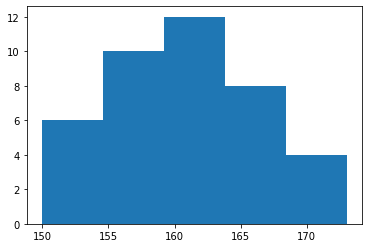

In [27]:
plt.hist(dados, classes);

In [28]:
frequencia, classes = np.histogram(dados, bins = 'sturges')
frequencia, classes

(array([ 5,  8,  3, 12,  5,  4,  3], dtype=int64),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

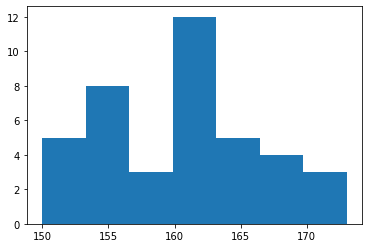

In [29]:
plt.hist(dados, classes);

### Distribuição de frequência e histograma com pandas e seaborn

In [30]:
type(dados)

numpy.ndarray

In [31]:
dataset = pd.DataFrame({'dados': dados})

In [32]:
dataset.head()

,dados
0,160
1,165
2,167
3,164
4,160


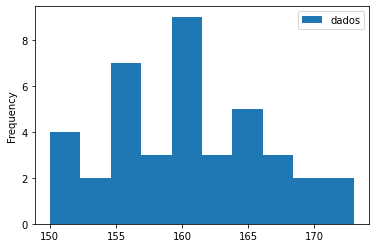

In [33]:
dataset.plot.hist();

C:\Users\yanks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


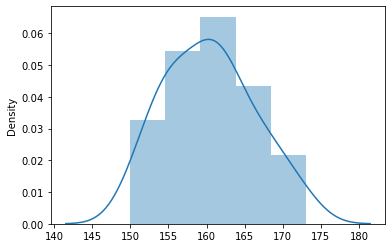

In [34]:
sns.distplot(dados, hist = True, kde = True);

### Exercício - idade census.csv

In [35]:
import pandas as pd
dataset = pd.read_csv('census.csv')

In [36]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
dataset['age'].max(), dataset['age'].min()

(90, 17)

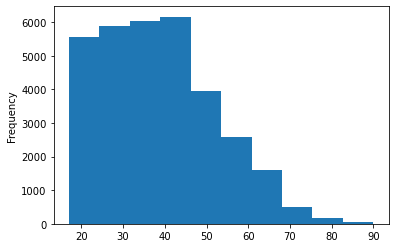

In [38]:
dataset['age'].plot.hist();

In [39]:
dataset['age'] = pd.cut(dataset['age'], bins=[0, 17, 25, 40, 60, 90], 
                        labels=['Faixa1', "Faixa2", "Faixa3", "Faixa4", "Faixa5"])

In [40]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
dataset['age'].unique()

['Faixa3', 'Faixa4', 'Faixa2', 'Faixa5', 'Faixa1']
Categories (5, object): ['Faixa1' < 'Faixa2' < 'Faixa3' < 'Faixa4' < 'Faixa5']

### Regras de associação

Bastante utilizado para:

    1. Análise de mercado:
    - Prateleiras de mercado:
    Em que prateleira o biscoito de chocolate deve ser colocado para maximizar suas vendas?
    Suco de uva costuma ser comprado com refrigerante?
    Qual produto pode ser colocado em promoção para uma venda casada com tomates?
        
    - Promoções com itens que são vendidos em conjunto
    - Planejar catálogos das lojas e folhetos de promoções
    
    2. Universidade: 
    - Controle de evasão em universidades
    
    3. Saúde e medicina:
    - Identificar combinações de sintomas que frequentemente ocorrem juntos para ajudar no diagnóstico precoce de doenças.
    - Analisar prescrições para descobrir combinações de medicamentos que podem levar a interações adversas.
    
    4. Comércio eletrônico:
    - Recomendação de produtos com base no histórico de compras dos clientes para aumentar a venda cruzada e a venda sugestiva.
    - Análise do comportamento de navegação para sugerir produtos que outros usuários com padrões de navegação semelhantes compraram.
    
    5. Segurança de TI:
    - Detectar padrões de atividades que podem indicar uma ameaça de segurança, como uma combinação de downloads e acessos a áreas sensíveis do sistema
    - Identificar combinações de falhas de login que sugerem tentativas de invasão.
    
    6. Banca e seguros:
    - Detectar fraudes por meio da identificação de padrões incomuns de transações que costumam ocorrer juntas em atividades fraudulentas.
    - Avaliar o risco de crédito analisando combinações de comportamentos de pagamento do cliente e outras variáveis financeiras.
    
    8. Telecomunicações:
    - Analisar padrões de uso para identificar clientes em risco de churn, oferecendo promoções específicas baseadas em suas atividades e preferências.
    - Otimizar a localização de torres de celular ao analisar combinações de alta demanda de serviço em diferentes áreas.
    
    9. Gestão de cadeia de suprimentos:
    - Prever a demanda de produtos baseando-se em combinações de pedidos anteriores e condições de mercado.
    - Identificar combinações de atrasos de fornecedores que podem impactar a produção.
    
    10. Transportes e logística:
    - Melhorar a eficiência do planejamento de rotas ao identificar padrões frequentes no movimento de veículos.
    - Otimizar a alocação de recursos analisando combinações de carga e rotas que maximizam o lucro.


#### Algoritmo Apriori

O algoritmo Apriori é um clássico no campo da mineração de dados, particularmente para a análise de regras de associação. Ele foi projetado para operar em bancos de dados contendo transações, como o histórico de compras em um supermercado, e é usado para identificar os conjuntos de itens que aparecem frequentemente juntos nas transações, conhecidos como "itemsets frequentes".

| Nº  | Leite | Café | Cerveja | Pão | Manteiga | Arroz | Feijão |
|-----|-------|------|---------|-----|----------|-------|--------|
| 1   | Não   | Sim  | Não     | Sim | Sim      | Não   | Não    |
| 2   | Sim   | Não  | Sim     | Sim | Sim      | Não   | Não    |
| 3   | Não   | Sim  | Não     | Sim | Sim      | Não   | Não    |
| 4   | Sim   | Sim  | Não     | Sim | Sim      | Não   | Não    |
| 5   | Não   | Não  | Sim     | Não | Não      | Não   | Não    |
| 6   | Não   | Não  | Não     | Não | Sim      | Não   | Não    |
| 7   | Não   | Não  | Não     | Sim | Não      | Não   | Não    |
| 8   | Não   | Não  | Não     | Não | Não      | Sim   | Não    |
| 9   | Não   | Não  | Não     | Não | Sim      | Sim   | Não    |
| 10  | Não   | Não  | Não     | Não | Não      | Não   | Sim    |

1. **Definição de suporte:** O algoritmo começa com a definição de um parâmetro chamado "suporte mínimo". O suporte de um itemset é definido como a proporção de transações na base de dados que contêm esse itemset. O suporte mínimo é o limiar que determina se um itemset é considerado "frequente".

2. **Geração de itemsets candidatos:** Inicialmente, o Apriori considera todos os itens individuais na base de dados e calcula o suporte de cada um. Os itens que têm um suporte menor que o suporte mínimo são descartados.

3. **Junção:** O algoritmo então gera itemsets de tamanho maior (com 2 itens, depois 3, e assim por diante) combinando os itemsets frequentes anteriores. Isso é feito apenas entre itemsets que têm todos os subconjuntos em comum, exceto pelo último item (estratégia de junção).

4. **Poda:** Após gerar um novo nível de itemsets candidatos, o Apriori realiza um passo de poda. Itemsets candidatos que têm algum subconjunto não frequente são eliminados, pois segundo o princípio da antimonotonicidade, um itemset não pode ser frequente se algum de seus subconjuntos imediatos não for frequente.

5. **Cálculo do suporte:** O suporte dos itemsets candidatos restantes é calculado. Aqueles que não atendem ao suporte mínimo são descartados.

6. **Repetição:** Os passos de junção, poda e cálculo do suporte são repetidos até que não haja novos itemsets frequentes a serem gerados.

7. **Geração de regras:** Uma vez identificados todos os itemsets frequentes, o algoritmo pode ser usado para gerar regras de associação, que sugerem uma relação forte entre um subconjunto de itens e outro dentro do mesmo itemset. Isso é feito calculando-se a confiança das regras, que é uma medida de quão frequentemente os itens no consequente da regra ocorrem com os itens no antecedente.

In [42]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
dataset_apriori = dataset[['age', 'workclass', 'education', 'marital-status', 'relationship', 'occupation',
                            'sex', 'native-country', 'income']]

In [44]:
dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [45]:
dataset.shape

(32561, 15)

In [46]:
dataset_apriori = dataset_apriori.sample(n = 1000)
dataset_apriori.shape

(1000, 9)

In [47]:
transacoes = []
for i in range(dataset_apriori.shape[0]):
  transacoes.append([str(dataset_apriori.values[i, j]) for j in range(dataset_apriori.shape[1])])

In [48]:
len(transacoes)

1000

In [49]:
transacoes[:2]

[['Faixa3',
  ' State-gov',
  ' Masters',
  ' Married-civ-spouse',
  ' Husband',
  ' Exec-managerial',
  ' Male',
  ' United-States',
  ' >50K'],
 ['Faixa3',
  ' Private',
  ' Some-college',
  ' Divorced',
  ' Unmarried',
  ' Adm-clerical',
  ' Female',
  ' United-States',
  ' <=50K']]

In [50]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2fdb7faab0ce153010e32c9dcff43e051c031ff96befbd0bca1674db6bbd19e9
  Stored in directory: c:\users\yanks\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [51]:
from apyori import apriori

In [52]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.2)
resultados = list(regras)

In [53]:
len(resultados)

35

In [54]:
resultados

[RelationRecord(items=frozenset({' <=50K'}), support=0.759, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.759, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.326, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.326, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.326, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.326, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.401, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.401, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.674, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.674, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0

In [55]:
resultados[12]

RelationRecord(items=frozenset({' Never-married', ' <=50K'}), support=0.316, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Never-married', ' <=50K'}), confidence=0.316, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Never-married'}), confidence=0.4163372859025033, lift=1.277108238964734), OrderedStatistic(items_base=frozenset({' Never-married'}), items_add=frozenset({' <=50K'}), confidence=0.9693251533742331, lift=1.277108238964734)])